In [27]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16,6]
plt.rcParams.update({'font.size': 18})

# Define randomized SVD function
def rSVD(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [42]:
A = imread(os.path.join('..','DATA','jupiter.jpg'))
X = np.mean(A,axis=2) # Convert RGB -> grayscale

U, S, VT = np.linalg.svd(X,full_matrices=0) # Deterministic SVD

r = 400 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X,r,q,p)

In [43]:
## Reconstruction
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XSVD,ord=2) / np.linalg.norm(X,ord=2)

XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XrSVD,ord=2) / np.linalg.norm(X,ord=2)

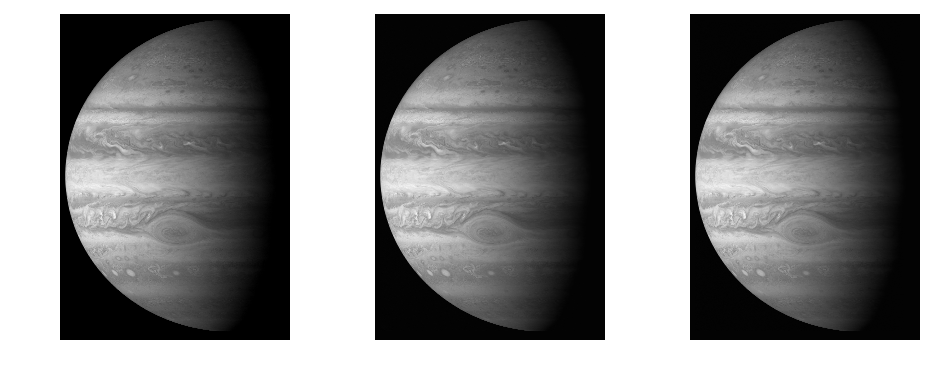

In [44]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

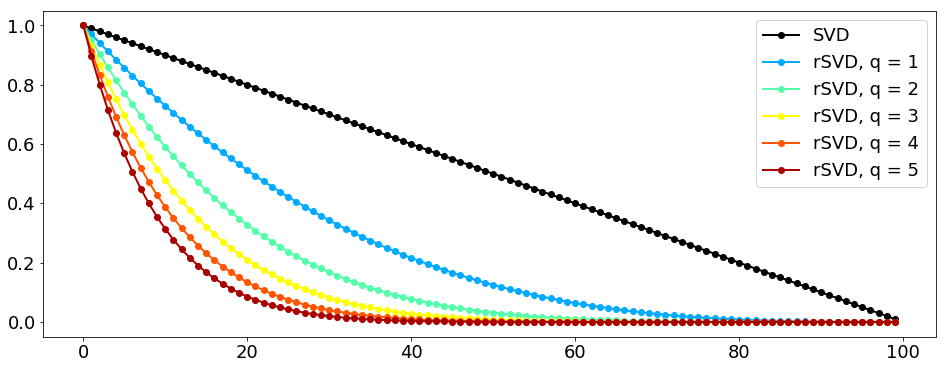

In [45]:
## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',LineWidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),LineWidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()